<img src="./logo_UNSAM.jpg" align="right" width="150" /> 

#### Análisis y Procesamiento de Señales

# Trabajo Práctico Nº1
#### Alumno: Mateo Murgia 
#### Profesor/es: Mariano Llamedo Soria , David Benoit, Jerman Jez


# Introducción

En el análisis de señales es fundamental comprender ciertos conceptos básicos que permiten su correcta caracterización y procesamiento.  

1. **Parámetros de una señal:**

- **Frecuencia**: indica cuántos ciclos por segundo presenta una señal periódica y se mide en Hertz (Hz).  
- **Amplitud**: representa el valor máximo alcanzado por la señal en el dominio temporal.  
- **Fase**: describe el desplazamiento horizontal de la señal respecto a un origen temporal de referencia.  

2. **Muestreo digital:**

- **Frecuencia de muestreo**: número de muestras tomadas por segundo al digitalizar una señal, denotada como \begin{equation} {f_s}\end{equation}.  
- **Período de muestreo**: intervalo temporal entre dos muestras consecutivas, definido como  

\begin{equation}
T_s = \frac{1}{f_s}
\end{equation}

- **Cantidad de muestras**: determina la duración total de la señal muestreada:  

\begin{equation}
T_{total} = N \cdot T_s
\end{equation}

3. **Relaciones entre señales:**

- **Ortogonalidad**: dos señales son ortogonales si su producto interno es nulo, es decir, si no comparten información común en el intervalo analizado.  
- **Correlación**: mide la similitud entre dos señales, indicando cuánto se parecen o cómo se alinean en el tiempo.  
- **Autocorrelación**: es la correlación de una señal consigo misma y permite detectar periodicidad, similitud interna y redundancias.  

---

Estos conceptos permiten describir matemáticamente las señales sinusoidales, cuadradas y pulsos utilizadas en este trabajo, así como comparar sus propiedades de potencia y energía en el dominio temporal.


# Desarrollo Experimental

En esta práctica implementé diferentes señales en **Python** utilizando la función `func_senoidal`, la cual me permitió definir parámetros como amplitud ($A$), frecuencia ($f$), fase ($\varphi$), cantidad de muestras ($N$), frecuencia de muestreo ($f_s$), período de muestreo ($T_s$) y duración total de la señal ($T_{\text{total}}$). A partir de esta función y otras utilidades de `NumPy` y `SciPy`, llevé a cabo las siguientes etapas:

---

### 1. Generación de señales básicas (Fig. 1)

- **Señal 1:** seno de $f = 2000 \, \text{Hz}$.  
- **Señal 2:** seno de $f = 2000 \, \text{Hz}$ desfasada en $\pi/2$.  
- **Señal 3:** modulación producto entre una portadora $f_p = 1000 \, \text{Hz}$ y una moduladora $f_m = 2000 \, \text{Hz}$.  
- **Señal 4:** seno de $f = 2000 \, \text{Hz}$ sometida a clipping en $\pm 0.75 \, V$.  
- **Señal 5:** onda cuadrada de $f = 4000 \, \text{Hz}$ generada con `scipy.signal.square`.  
- **Señal 6:** pulso rectangular de duración $T_p = 2 \, \text{ms}$ dentro de una ventana de $T = 10 \, \text{ms}$.


---

### 2. Cálculo de parámetros
- Para cada señal periódica calculé la **potencia promedio** como:

$$
P = \frac{1}{N} \sum_{n=0}^{N} x^2[n]
$$

- En el caso del pulso rectangular, determiné la **energía**:

$$
E = \sum_{n=0}^{N} x^2[n] \cdot T_s
$$

- También registré valores de frecuencia de muestreo, período de muestreo y número de muestras:

$$
T_s = \frac{1}{f_s}, \quad T_{\text{total}} = N \cdot T_s
$$

---

### 3. Producto interno
- Implementé una función para calcular el **producto interno** entre dos señales:

$$
\langle x, y \rangle = \sum_{n=0}^{N-1} x[n] \cdot y[n]
$$

- Comparé la Señal 1 con las demás (2 a 6).  
- La única que en teoría debería dar un producto interno igual a cero es la **Señal 2**, ya que está desfasada $\pi/2$ y se comporta como un coseno, ortogonal al seno. En la práctica, el resultado fue cercano a cero pero no nulo, debido a la cantidad limitada de muestras y a que no se cubrieron períodos completos.  
- Para el resto de las señales (3 a 6), no es esperable que el producto interno sea cero, ya que se alejan de la forma de un coseno y contienen componentes adicionales de frecuencia (por modulación, clipping, forma cuadrada o naturaleza de pulso).


### 4. Análisis de correlación (Fig. 1)
- Calculé la **autocorrelación** de la Señal 1:

$$
R_{xx}[k] = \sum_{n=0}^{N-1} x[n] \cdot x[n-k]
$$

lo que me permitió verificar su periodicidad.  

- También obtuve correlaciones cruzadas con el resto de las señales, observando cómo varía el grado de similitud en cada caso.

---

### 5. Verificación de identidad trigonométrica (Fig.2)
- Finalmente comprobé la igualdad: 

$$
2 \sin(\alpha)\sin(\beta) - \cos(\alpha - \beta) + \cos(\alpha + \beta) = 0
$$

bajo la condición 
$$
\alpha = \omega t, \quad \alpha = 2\beta
$$

- Para ello, generé las señales correspondientes con `func_senoidal`, y confirmé que el resultado se mantiene nulo dentro de la tolerancia numérica en todos los instantes muestreados.

---

En síntesis, el desarrollo experimental me permitió implementar y analizar señales en el dominio temporal, calcular sus potencias y energías, estudiar su correlación y ortogonalidad, y validar identidades trigonométricas mediante simulación digital.


# INTRODUCCION

# Fig. 1 
En esta imagen armé en orden todas las señales propuestas al principio, y luego la autocorrelación de la señal 1, y las correlaciones con 
el resto de las señales.

Producto interno Señal 1 - Señal 2: 0.982937487066643
Producto interno Señal 1 - Señal 3: 2.9183676174951345
Producto interno Señal 1 - Señal 4: 42.18528610640103
Producto interno Señal 1 - Señal 5: -1.6617223468946711
Producto interno Señal 1 - Señal 6: -3.9614852840010677


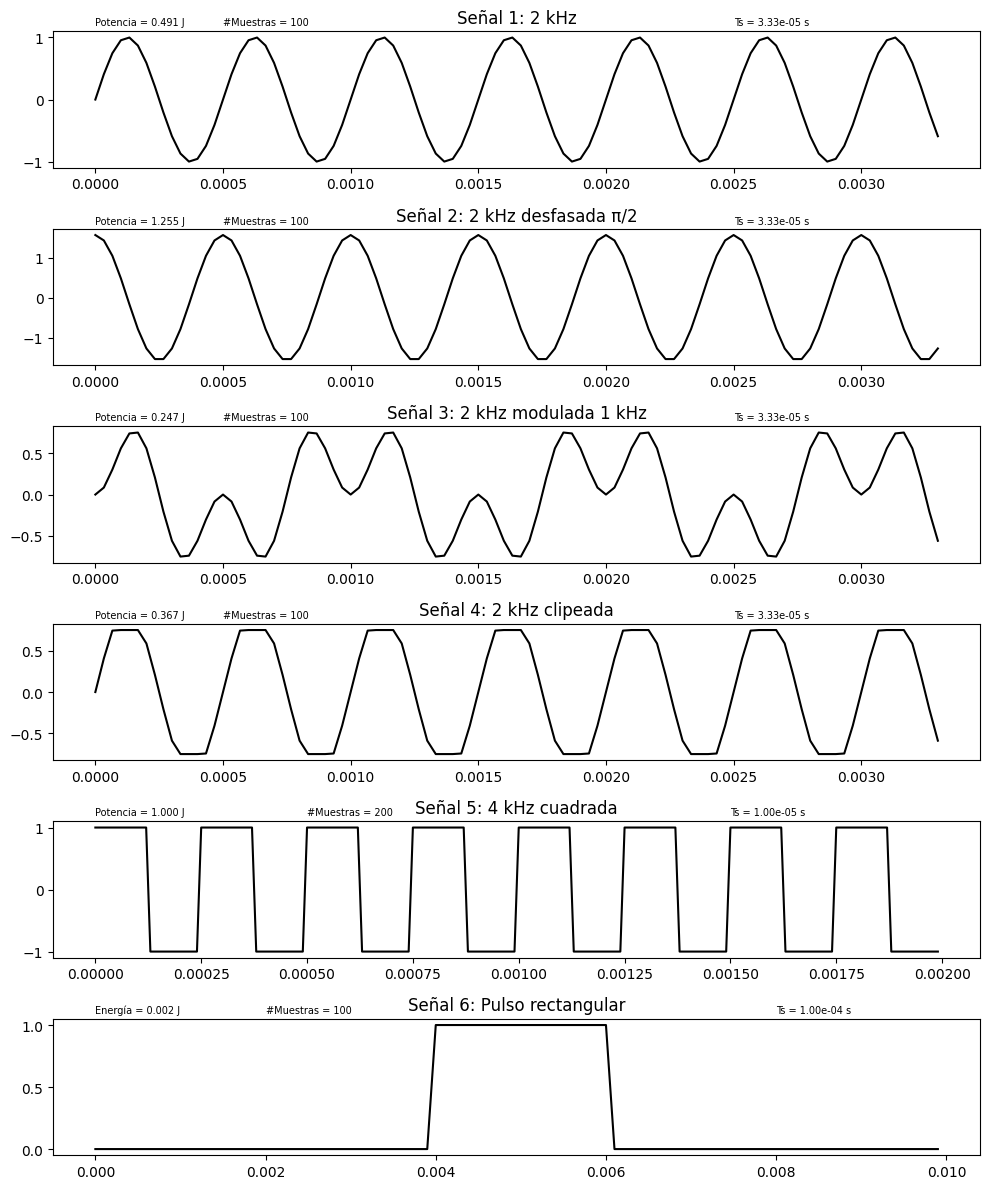

✅ La identidad se cumple para toda frecuencia !


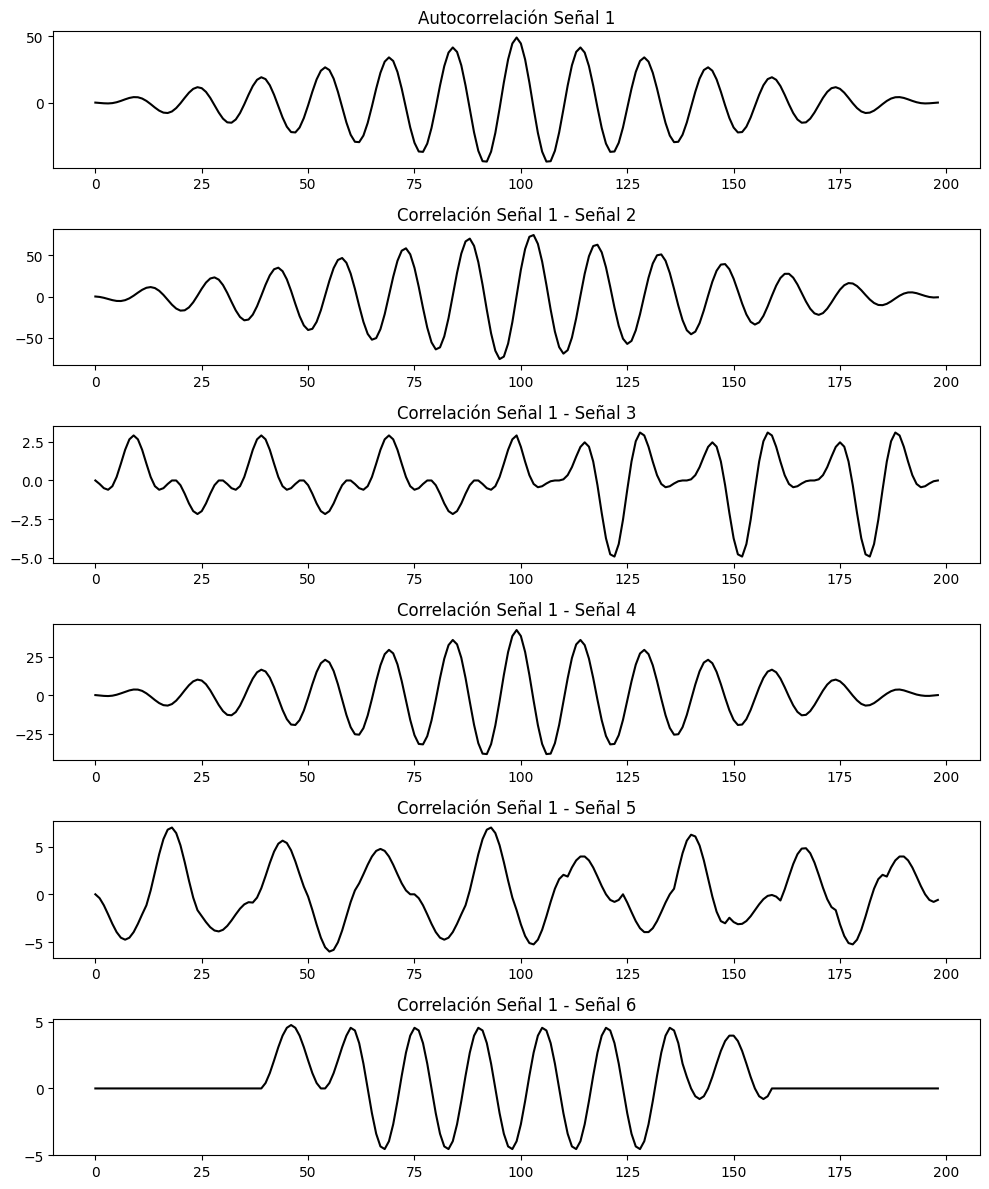

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sp


# Función senoidal

def func_senoidal(a_max, frec, fase, cant_muestras, frec_muestreo, v_medio):
    Ts = 1/frec_muestreo
    t_final = cant_muestras * Ts
    tt = np.arange(0, t_final, Ts)
    xx = a_max * np.sin(2 * np.pi * frec * tt + fase) + v_medio
    return tt, xx


# Señales


# Señal 1
frec_muestreo1 = 30000
cant_muestras1 = 100
tt_1, ss_1 = func_senoidal(1, 2000, 0, cant_muestras1, frec_muestreo1, 0)
Ts1 = 1/frec_muestreo1
potencia1 = np.sum(ss_1**2) / cant_muestras1

# Señal 2
tt_2, ss_2 = func_senoidal(np.pi/2, 2000, np.pi/2, 100, 30000, 0)
Ts2 = 1/30000
potencia2 = np.sum(ss_2**2) / len(ss_2)

# Señal 3 (modulación)
tt_3, portadora = func_senoidal(1, 1000, 0, 100, 30000, 0)
_, modulada = func_senoidal(1, 2000, 0, 100, 30000, 0)
final = portadora * modulada
Ts3 = 1/30000
potencia3 = np.sum(final**2) / len(final)

# Señal 4 (clipeada)
tt_4, ss_4 = func_senoidal(1, 2000, 0, 100, 30000, 0)
ss_clip = np.clip(ss_4, -0.75, 0.75)
Ts4 = 1/30000
potencia4 = np.sum(ss_clip**2) / len(ss_clip)

# Señal 5 (cuadrada)
frec5 = 4000
frec_muestreo5 = 100000
cant_muestras5 = 200
Ts5 = 1/frec_muestreo5
t_final5 = cant_muestras5 * Ts5
tt_5 = np.arange(0, t_final5, Ts5)
onda_cuadrada = sp.square(2 * np.pi * frec5 * tt_5)
potencia5 = np.sum(onda_cuadrada**2) / len(onda_cuadrada)

# Señal 6 (pulso rectangular)
frec_muestreo6 = 10000
Ts6 = 1/frec_muestreo6
t_final6 = 0.01
tt_6 = np.arange(0, t_final6, Ts6)
pulso = np.zeros(len(tt_6))
pulso[(tt_6 >= 0.004) & (tt_6 <= 0.006)] = 1.0
energia6 = np.sum(pulso**2) * Ts6


# Productos internos

def producto_interno(x, y):
    return np.sum(x*y)

print("Producto interno Señal 1 - Señal 2:", producto_interno(ss_1, ss_2))
print("Producto interno Señal 1 - Señal 3:", producto_interno(ss_1, final))
print("Producto interno Señal 1 - Señal 4:", producto_interno(ss_1, ss_clip))
print("Producto interno Señal 1 - Señal 5:", producto_interno(ss_1, onda_cuadrada[:len(ss_1)]))
print("Producto interno Señal 1 - Señal 6:", producto_interno(ss_1, pulso[:len(ss_1)]))


# Bloque 1 (plot): Señales

plt.figure(figsize=(10,12))

plt.subplot(6,1,1)
plt.plot(tt_1, ss_1, color='black')
plt.text(0, 1.2, f"Potencia = {potencia1:.3f} J", fontsize=7)
plt.text(0.0005, 1.2, f"#Muestras = {cant_muestras1}", fontsize=7)
plt.text(0.0025, 1.2, f"Ts = {Ts1:.2e} s", fontsize=7)
plt.title("Señal 1: 2 kHz")

plt.subplot(6,1,2)
plt.plot(tt_2, ss_2, color='black')
plt.text(0, 1.85, f"Potencia = {potencia2:.3f} J", fontsize=7)
plt.text(0.0005, 1.85, f"#Muestras = {len(ss_2)}", fontsize=7)
plt.text(0.0025, 1.85, f"Ts = {Ts2:.2e} s", fontsize=7)
plt.title("Señal 2: 2 kHz desfasada π/2")

plt.subplot(6,1,3)
plt.plot(tt_3, final, color='black')
plt.text(0, 0.9, f"Potencia = {potencia3:.3f} J", fontsize=7)
plt.text(0.0005, 0.9, f"#Muestras = {len(final)}", fontsize=7)
plt.text(0.0025, 0.9, f"Ts = {Ts3:.2e} s", fontsize=7)
plt.title("Señal 3: 2 kHz modulada 1 kHz")

plt.subplot(6,1,4)
plt.plot(tt_4, ss_clip, color='black')
plt.text(0, 0.9, f"Potencia = {potencia4:.3f} J", fontsize=7)
plt.text(0.0005, 0.9, f"#Muestras = {len(ss_clip)}", fontsize=7)
plt.text(0.0025, 0.9, f"Ts = {Ts4:.2e} s", fontsize=7)
plt.title("Señal 4: 2 kHz clipeada")

plt.subplot(6,1,5)
plt.plot(tt_5, onda_cuadrada, color='black')
plt.text(0, 1.2, f"Potencia = {potencia5:.3f} J", fontsize=7)
plt.text(0.0005, 1.2, f"#Muestras = {len(onda_cuadrada)}", fontsize=7)
plt.text(0.00150, 1.2, f"Ts = {Ts5:.2e} s", fontsize=7)
plt.title("Señal 5: 4 kHz cuadrada")

plt.subplot(6,1,6)
plt.plot(tt_6, pulso, color='black')
plt.text(0, 1.1, f"Energía = {energia6:.3f} J", fontsize=7)
plt.text(0.002, 1.1, f"#Muestras = {len(tt_6)}", fontsize=7)
plt.text(0.008, 1.1, f"Ts = {Ts6:.2e} s", fontsize=7)
plt.title("Señal 6: Pulso rectangular")

plt.tight_layout()
plt.show()


# Bloque 2(plot): Correlaciones

plt.figure(figsize=(10,12))

plt.subplot(6,1,1)
plt.plot(sp.correlate(ss_1, ss_1, mode='full'), color='black')
plt.title("Autocorrelación Señal 1")

plt.subplot(6,1,2)
plt.plot(sp.correlate(ss_1, ss_2, mode='full'), color='black')
plt.title("Correlación Señal 1 - Señal 2")

plt.subplot(6,1,3)
plt.plot(sp.correlate(ss_1, final, mode='full'), color='black')
plt.title("Correlación Señal 1 - Señal 3")

plt.subplot(6,1,4)
plt.plot(sp.correlate(ss_1, ss_clip, mode='full'), color='black')
plt.title("Correlación Señal 1 - Señal 4")

plt.subplot(6,1,5)
plt.plot(sp.correlate(ss_1, onda_cuadrada[:len(ss_1)], mode='full'), color='black')
plt.title("Correlación Señal 1 - Señal 5")

plt.subplot(6,1,6)
plt.plot(sp.correlate(ss_1, pulso[:len(ss_1)], mode='full'), color='black')
plt.title("Correlación Señal 1 - Señal 6")




# Señal base (2 kHz)

frec_muestreo1 = 30000
cant_muestras1 = 100
frec1 = 2000  # Hz

# alfa = 2000 Hz, beta = 1000 Hz
tt_1, sen_alfa = func_senoidal(1, frec1, 0, cant_muestras1, frec_muestreo1, 0)
tt_2, sen_beta = func_senoidal(1, frec1/2, 0, cant_muestras1, frec_muestreo1, 0)

# Para definir el coseno simplemente desfase el seno pi/2
tt_3, cos_alfa_menos_beta = func_senoidal(1, frec1 - frec1/2, np.pi/2, cant_muestras1, frec_muestreo1, 0)
tt_4, cos_alfa_mas_beta   = func_senoidal(1, frec1 + frec1/2, np.pi/2, cant_muestras1, frec_muestreo1, 0)


identidad = 2*sen_alfa*sen_beta - cos_alfa_menos_beta + cos_alfa_mas_beta

if max(abs(identidad)) < 1e-10:
    print("✅ La identidad se cumple para toda frecuencia !")
else:
    print("❌ La identidad NO se cumple")


plt.tight_layout()


# Fig. 2
En esta imagen demostré la igualdad del ejercicio 3a

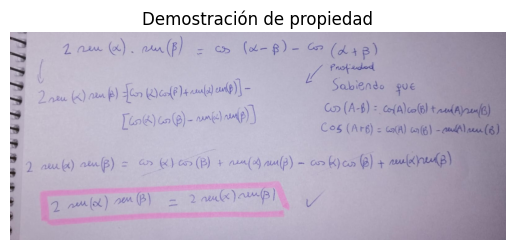

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("imagen APS.jpg")
plt.imshow(img)
plt.axis("off")
plt.title("Demostración de propiedad")
plt.show()




# Conclusiones


- Implementé distintas señales (senoidales, moduladas, cuadradas y pulsos) en Python, verificando parámetros fundamentales como frecuencia ($f$), período de muestreo ($T_s$), cantidad de muestras ($N$), potencia y energía. Esto permitió reforzar la relación entre teoría y simulación digital.

- Observé que la única señal que debería ser ortogonal a la Señal 1 es la **Señal 2** (desfasada en $\pi/2$). Teóricamente, $\langle \sin, \cos \rangle = 0$, pero el cálculo numérico arrojó un valor cercano a cero y no exactamente nulo, debido a la cantidad limitada de muestras y al hecho de no abarcar períodos completos. Para el resto de las señales, no se cumple ortogonalidad, ya que se alejan de la forma de un coseno.

- El análisis de correlación mostró que la **autocorrelación** de la Señal 1 refleja su similitud consigo misma, lo que confirma la coherencia interna de la señal. En cambio, las correlaciones cruzadas con las demás señales evidenciaron menor similitud, salvo con la Señal 2 donde se verificó la condición de ortogonalidad aproximada.

- La verificación de la identidad trigonométrica

$$
2 \sin(\alpha)\sin(\beta) - \cos(\alpha - \beta) + \cos(\alpha + \beta) = 0
$$

con $\alpha = \omega t$ y $\alpha = 2\beta$ se cumplió numéricamente, confirmando la validez de la relación teórica en el dominio discreto.

- En síntesis, el trabajo permitió comprobar de manera experimental conceptos fundamentales de teoría de señales: muestreo, cálculo de potencia y energía, ortogonalidad, correlación y validación de identidades trigonométricas.



## Autoevaluación del aprendizaje

Resolvì la tarea con seguridad. Durante el desarrollo logré afianzar varios conceptos importantes de la materia:

- Entendí mejor el concepto de **autocorrelación** y de **correlación cruzada**, comprendiendo su aplicación en la comparación de señales.  
- Diferencié claramente entre **potencia** y **energía** en el contexto de señales, identificando en qué casos corresponde usar cada uno.  
- Experimentando y equivocándome pude ver la importancia de los **conceptos teóricos** (teorema de Nyquist, frecuencia de muestreo, cantidad de muestras) al aplicarlos en la práctica. Si bien el teorema marca un mínimo, en la práctica terminé utilizando frecuencias de muestreo mucho mayores para obtener una mejor visualización de las señales.  
- Me afiancé en el uso de herramientas como **Spyder**, **Jupyter Notebook**, la **consola de Python (cmd)** y descubrí la utilidad de la librería **SciPy** para el manejo de señales.  

Además, utilicé **ChatGPT** como apoyo, para:  
- Redacción de textos del informe.  
- Consultar conceptos teóricos que no me quedaban del todo claros a pesar de haberlos leído en el libro de Holton.  
